**MLP классификатор** 

Евгений Борисов  <esborisov@sevsu.ru>

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=2)

## генерируем данные

In [3]:
n_samples = 500

from sklearn.datasets import make_blobs
X,target = make_blobs( n_samples=n_samples, centers=2,  cluster_std=[1.5, 1.8,] )

# from sklearn.datasets import make_moons
# X,target = make_moons(n_samples=n_samples, noise=.09)

y = np.eye(len(target),2)[target] # [:,np.newaxis]

X.shape, y.shape

((500, 2), (500, 2))

In [4]:
# нормируем данные
# from sklearn.preprocessing import MinMaxScaler
# X = MinMaxScaler([-1.0,1.0]).fit_transform(X)

# from sklearn.preprocessing   import StandardScaler
# X = StandardScaler().fit(X).transform(X)

In [5]:
# np.percentile(X,[10,25,50,75,95],axis=0) 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((250, 2), (250, 2), (250, 2), (250, 2))

In [7]:
del X
del y
del target

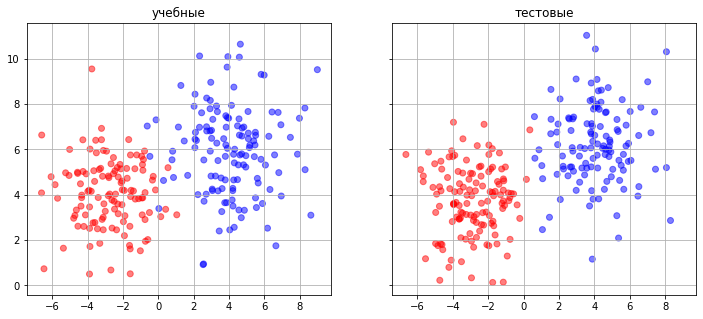

In [8]:
def plot_data(ax,X,y,t):
    c = [ ['b','r','g','y'][j] for j in y.astype(int).flatten()  ]
    ax.set_title(t)
    ax.scatter( x=X[:,0], y=X[:,1], c=c,  alpha=0.5 )
    ax.grid()

fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X_train,y_train[:,0],'учебные')    
plot_data(ax1,X_test,y_test[:,0],'тестовые')    
plt.show()

In [9]:
# from sklearn.preprocessing import PolynomialFeatures

# poly_degree = 1 # степень полинома

# # собираем полином, добавляем столбец из единиц (свободный член)
# poly = PolynomialFeatures(poly_degree).fit(X_train)
# Xp = poly.transform(X_train)
# Xp.shape

## модель

In [10]:
def state(x,w,b): # состояние нейронов слоя
    return x.dot(w) + b

In [11]:
def sigmoid(u): # функция активации
    return 1./(1. + np.exp(-u))

act = sigmoid

In [12]:
def diff_sigmoid(u): # производная активации
    return ( np.square(sigmoid(u))*np.exp(-u) )
diff_act = diff_sigmoid

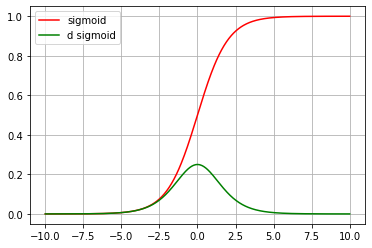

In [13]:
u=np.linspace(-10,10,500)
plt.plot( u,act(u),'-r', label='sigmoid' )
plt.plot( u,diff_act(u),'-g', label='d sigmoid' )
plt.grid()
plt.legend()

In [14]:
def layer(x,w,b): # выход слоя
    return act(state(x,w,b))

In [15]:
# def layer_partial(x,w,b ): # частные производные слоя по его аргументам
#     return diff_act( state(x,w,b) )*x

In [16]:
def model(x,W): # выход модели
    o = x
    for w,b in W: o = layer(o,w,b)
    return o 

In [34]:
def model_partial(x,W): # выход модели
    p = []
    o = x
    for w,b in W: 
        s = state(o,w,b)
        p.append( o.T.dot(diff_act(s)) )
        o = act(s)
        
    return p

---

In [35]:
model_size = [ X_train.shape[1],10, y_train.shape[1] ]

def init_weight(model_size):
    return  [ 
        [ rng.normal(size=model_size[i:i+2],scale=.1), np.zeros(model_size[i+1]) ] 
         for i in range(len(model_size)-1)
        ]

W = init_weight(model_size)
[ [ w[0].shape,w[1].shape] for w in W]

[[(2, 10), (10,)], [(10, 2), (2,)]]

In [36]:
# model(X_train,W)

In [38]:
# [ p.shape  for p in model_partial(X_train,W) ]

In [ ]:
# import graphviz
# dot = graphviz.Digraph()
# dot.attr(size='6,7')

# layer = []
# l=0
# for n in range(model_size[0]):
#     node=f'{l}-{n}'
#     dot.node(node,f'{n}')
#     layer.append(node)

# for l,s in enumerate(model_size[1:],1):
#     layer_prev = layer.copy()
#     layer=[]
#     for n in range(s):
#         node=f'{l}-{n}'
#         dot.node(node,f'{n}')
#         for lp in layer_prev: dot.edge(lp,node)        
#         layer.append(node)
    

# dot        

---

## обучаем модель

функция потери средняя квадратичная ошибка
$$L=MSQE(y,o)=\frac{1}{m}\sum\limits_{i=0}^m(o_i-y_i)^2$$

In [23]:
def msqe(y,o): # средняя квадратичная ошибка
    d = o-y 
    return np.square(d).sum()/(len(y)*y.shape[1])

loss = msqe

In [24]:
msqe(y_train,model(X_train,W))

0.2514393253196171

---

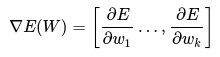

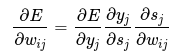

частные производные функции потери по параметрам модели (градиент)

$$ \frac{\partial E }{\partial w} = 2 \cdot( o - y ) \cdot \frac{\partial o }{\partial w}  $$

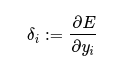

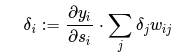

In [ ]:
def back_prop(d,W): 
    pass

In [ ]:
def msqe_partial(x,W,y): # градиент функции потери,
    d = model(x,W)-y
    d = [d,back_prop(d,W)]
    
    # g = model_partial(x,w).T.dot(model(x,w)-y) # градиент msqe
    #g /= np.abs(g).max() # нормируем градиент
    #return g.flatten()
    
    return d

# gradient = msqe_partial

---

In [ ]:
def weight_adjust(w,g,lr):
    return w - lr*g # корректируем параметры

In [ ]:
def fit_epoch(x,y,w,lr): # шаг обучения модели
    g = gradient(x,w,y) # градиент функции потери, изменение весов
    return weight_adjust(w,g,lr) # корректируем параметры

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
%%time

# метод градиентного спуска

lr = 1e-2 # скорость обучени
n_samples = len(y_train) # количество примеров
n_epoch = 200 # максимальное число циклов обучения
acc_min = .98 # порог минимально допустимой погрешности модели
n_param = Xp.shape[1] # размер вектора признаков

# инициализация параметров модели
w = rng.normal(size=(n_param))
#w = np.array( [0] + [1]*(n_param-1) )

# начальное значение ф-ции потери
loss_history = [ loss(y_train,model(Xp,w)) ]
acc_history = [ accuracy_score( y_train , (model(Xp,w)>.5).astype(int) ) ]

for i in range(n_epoch): # цикл обучения
    w = fit_epoch(Xp,y_train,w,lr) # корректируем веса модели
    loss_history.append( loss(y_train,model(Xp,w)) ) # считаем значение ф-ции потери
    acc_history.append( accuracy_score( y_train , (model(Xp,w)>.5).astype(int) ) )
    
    if acc_history[-1] > acc_min: # проверяем достижение минимального порога погрешности модели
        print('step %i/%i: loss %.03f, acc threshold %.03f reached\n'%(i+1,n_epoch,loss_history[-1],acc_min))
        break

In [ ]:
# история изменения значений погрешности модели
plt.plot(acc_history,label='max acc=%.3f'%(max(acc_history)))
plt.grid()
plt.legend()

In [ ]:
# история изменения значений ф-ции потери
plt.plot(loss_history,label='min loss=%.3f'%(min(loss_history)))
plt.grid()
plt.legend()

## тестируем модель

In [ ]:
s = model(poly.transform(X_test),w)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve( y_test, s )
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(7,7))
plt.grid(True)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC AUC %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# оптимальный порого скора 
#  максимальное количество True Positive при минимальном количестве False Positive
optimal_threshold = thresholds[ np.argmax( np.abs(tpr-fpr) )  ]
optimal_threshold

In [ ]:
p = (s>optimal_threshold).astype(int)
y = (y_test>0).astype(int)

In [ ]:
fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X_test,y,'тестовые')    
plot_data(ax1,X_test,p,'результат')    
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y,p))

## карта скоров

In [ ]:
# строим сетку и определяем значения скора классификатора во всех узлах

n=500 # количество разбиений сетки

xx,yy = np.meshgrid(
    np.linspace( X_test[:,0].min()-.1, X_test[:,0].max()+.1, n), 
    np.linspace( X_test[:,1].min()-.1, X_test[:,1].max()+.1, n)
) # узлы сетки

xy = np.vstack([xx.flatten(),yy.flatten() ]).T # разворачиваем сетку 

s = model(poly.transform(xy),w)

plt.figure(figsize=(7,7))
plt.contourf(xx, yy, (1.-s).reshape(n,n), cmap=plt.cm.RdBu)
plt.scatter( x=X_test[:,0], y=X_test[:,1], c=y_test, alpha=.5 )
plt.grid()